In [1]:

import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData
from pyuvdata import uvutils
from hera_qm import ant_metrics
import hera_cal
from copy import deepcopy
from scipy.signal import medfilt2d
from collections import OrderedDict
from matplotlib import cm

from matplotlib.colors import SymLogNorm
import sys
import os
from hera_qm import xrfi as xrfi
import numpy.ma as ma
from glob import glob
import math


In [2]:
#Final Mod Z scores(everything)
#Final Metrics
#All Antenna/Observations
#Start Plotting


In [3]:

am_set_up = ant_metrics.load_antenna_metrics('/data6/HERA/data/ant_metrics/2458210/zen.2458210.66214.HH.uv.ant_metrics.json')


In [4]:
am_set_up.keys()

[u'dead_ant_z_cut',
 u'cross_pol_z_cut',
 u'datafile_list',
 u'always_dead_ant_z_cut',
 u'all_metrics',
 u'all_mod_z_scores',
 u'crossed_ants',
 u'reds',
 u'final_mod_z_scores',
 u'version',
 u'removal_iteration',
 u'xants',
 u'history',
 u'dead_ants',
 u'final_metrics']

In [5]:

direct_list = np.sort(glob('/data6/HERA/data/ant_metrics/2458*'))


In [6]:

num_times = 0

time_array = []

for i in direct_list:
    
    times = np.sort(glob(i + '/*'))
    
    for j in times:
        
        num_times = num_times + 1
        
        time_array.append(float(j[41:54]))

print num_times


13601


In [7]:

#Create a dictionary "container" to hold all of our relevant information"

container = {}

#Create a dictionary "holder1" which will be used as an element in the holder dictionary.
#holder1 will contain arrays for the specific values for every json file

holder1 = {'redCorr': np.zeros(num_times),'meanVijXPol': np.zeros(num_times),'meanVij': np.zeros(num_times), 'redCorrXPol': np.zeros(num_times)}

#The dictionary "holder" will contain holder1 as elements, with distinguishing between the metrics and mod z score

holder = {'final_metrics': deepcopy(holder1), 'final_mod_z_scores': deepcopy(holder1)}

#Loop through each key of the shown dictionary in order to create a key for every antenna/polarization

for i in am_set_up['final_metrics']['redCorr'].keys():
    
    #Set the elements of those keys to be the dictionary holder from above
    
    container[i] = deepcopy(holder)


In [8]:
print container

{(67, 'y'): {'final_mod_z_scores': {'meanVijXPol': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), 'meanVij': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), 'redCorr': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), 'redCorrXPol': array([ 0.,  0.,  0., ...,  0.,  0.,  0.])}, 'final_metrics': {'meanVijXPol': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), 'meanVij': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), 'redCorr': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), 'redCorrXPol': array([ 0.,  0.,  0., ...,  0.,  0.,  0.])}}, (182, 'y'): {'final_mod_z_scores': {'meanVijXPol': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), 'meanVij': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), 'redCorr': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), 'redCorrXPol': array([ 0.,  0.,  0., ...,  0.,  0.,  0.])}, 'final_metrics': {'meanVijXPol': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), 'meanVij': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), 'redCorr': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), 'redCorrXPol': array([ 0.,  0.,  0.

In [9]:

#Initialize an index variable so that the specific json value will not change

index = 0

#direct_list is a list of the directories containing the json files for each distinct night of observation

for i in direct_list:
    
    #times will be a list of each json file for observation "i"
    
    times = np.sort(glob(i + '/*'))
    
    print i
    
    for j in times:
        
        #Have "am" be a dictionary for each json file "j", which will contain all the relevant information
        
        am = ant_metrics.load_antenna_metrics(j)
        
        #"k" in this case will loop through redCorr and meanVij for both normal and cross polarizations.
        
        for k in am['final_metrics'].keys():
            
            #"l" will be the individual antenna and their polarizations
            
            for l in am['final_metrics'][k].keys():
                
                #The index value corresponds to the index of the given time aspect.
                
                container[l]['final_metrics'][k][index] = am['final_metrics'][k][l]
            
        #The behavior of the below iterators mirrors that of the above, only this loop focuses on the mod z scores
        
        for m in am['final_mod_z_scores'].keys():
            
            for n in am['final_mod_z_scores'][m].keys():
                
                container[n]['final_mod_z_scores'][m][index] = am['final_mod_z_scores'][m][n]
        
        #Iterate index to the next time element
        
        index += 1    


/data6/HERA/data/ant_metrics/2458002
/data6/HERA/data/ant_metrics/2458003
/data6/HERA/data/ant_metrics/2458004
/data6/HERA/data/ant_metrics/2458005
/data6/HERA/data/ant_metrics/2458006
/data6/HERA/data/ant_metrics/2458007
/data6/HERA/data/ant_metrics/2458008
/data6/HERA/data/ant_metrics/2458009
/data6/HERA/data/ant_metrics/2458010
/data6/HERA/data/ant_metrics/2458011
/data6/HERA/data/ant_metrics/2458012
/data6/HERA/data/ant_metrics/2458013
/data6/HERA/data/ant_metrics/2458014
/data6/HERA/data/ant_metrics/2458015
/data6/HERA/data/ant_metrics/2458016
/data6/HERA/data/ant_metrics/2458017
/data6/HERA/data/ant_metrics/2458018
/data6/HERA/data/ant_metrics/2458019
/data6/HERA/data/ant_metrics/2458020
/data6/HERA/data/ant_metrics/2458021
/data6/HERA/data/ant_metrics/2458022
/data6/HERA/data/ant_metrics/2458025
/data6/HERA/data/ant_metrics/2458026
/data6/HERA/data/ant_metrics/2458027
/data6/HERA/data/ant_metrics/2458028
/data6/HERA/data/ant_metrics/2458029
/data6/HERA/data/ant_metrics/2458030
/

In [10]:
print container

{(67, 'y'): {'final_mod_z_scores': {'meanVijXPol': array([ 8.71974608,  5.64215344,  5.57651626, ..., -0.29579153,
       -0.51374536, -0.5951263 ]), 'meanVij': array([ 1.25832196,  1.93405781,  1.9044894 , ...,  1.07765199,
        1.24727218,  1.41531587]), 'redCorr': array([-1.27058688, -0.43604992, -0.17642286, ...,  0.6127294 ,
        0.49605274,  0.59024085]), 'redCorrXPol': array([ 4.99594809,  4.48596182,  2.54515068, ...,  1.53167501,
        1.49914506,  1.04046571])}, 'final_metrics': {'meanVijXPol': array([ 1.01146907,  0.98862315,  0.98229026, ...,  0.2722236 ,
        0.27982354,  0.34472615]), 'meanVij': array([ 0.64847337,  0.71353524,  0.69836895, ...,  0.54309528,
        0.53712547,  0.52906599]), 'redCorr': array([ 0.29087565,  0.35948474,  0.39636927, ...,  0.99129883,
        0.98864051,  0.97730167]), 'redCorrXPol': array([ 4.99594809,  4.48596182,  2.54515068, ...,  1.53167501,
        1.49914506,  1.04046571])}}, (182, 'y'): {'final_mod_z_scores': {'meanVijXPo

In [11]:
print len(am_set_up['final_metrics']['redCorr'].keys())

142


In [12]:
print am_set_up

{u'dead_ant_z_cut': 5.0, u'cross_pol_z_cut': 5.0, u'datafile_list': ['/data/zen.2458210.66214.xx.HH.uv', '/data/zen.2458210.66214.yy.HH.uv', '/data/zen.2458210.66214.xy.HH.uv', '/data/zen.2458210.66214.yx.HH.uv'], u'always_dead_ant_z_cut': 10.0, u'all_metrics': [{'meanVijXPol': {(67, 'y'): 0.3447261463570525, (40, 'x'): 0.37447445614900066, (143, 'y'): 0.5622691568035255, (182, 'y'): 0.5335709423405391, (84, 'y'): 0.32138011044734544, (123, 'y'): 0.4345854961443072, (13, 'x'): 0.42854416017997543, (14, 'x'): 0.4530282573667633, (101, 'y'): 0.30388107098609873, (140, 'y'): 0.3757833247879217, (69, 'x'): 0.32238346795819517, (70, 'x'): 0.35789607379249966, (120, 'y'): 0.4071723804131776, (38, 'y'): 0.33452181409828413, (116, 'x'): 0.4500613161836111, (137, 'y'): 0.3879968879500764, (55, 'y'): 0.33986531406156933, (23, 'x'): 0.3941180482703021, (181, 'x'): 0.5457566408907878, (182, 'x'): 0.5335709423405391, (84, 'x'): 0.32138011044734544, (13, 'y'): 0.42854416017997543, (52, 'y'): 0.33682

In [13]:
test = container[(1,'x')]['final_metrics']['redCorr']

print test

[ 0.4009928   0.41277366  0.42000735 ...,  0.94202817  0.93399646
  0.91877613]


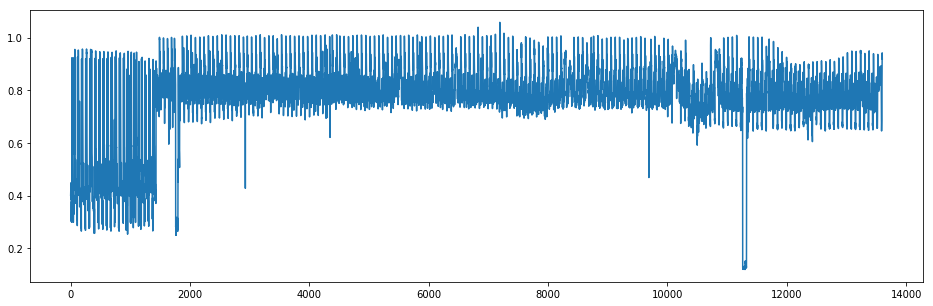

In [14]:

plt.figure(figsize = (16,5))

plt.plot(range(num_times),test)

plt.show()


# Store the Results in Plottable Arrays

In [15]:

antenna_lst = sorted(container)

metric_redCorr = np.zeros((num_times,142))

for i in range(num_times):
    
    ant_ind = 0
               
    for j in antenna_lst:
        
        metric_redCorr[i][ant_ind] = container[j]['final_metrics']['redCorr'][i]
               
        ant_ind += 1

print metric_redCorr

print metric_redCorr.shape


[[ 0.31156562  0.3251618   0.4009928  ...,  0.          0.          0.        ]
 [ 0.31535106  0.3402893   0.41277366 ...,  0.          0.          0.        ]
 [ 0.33115335  0.38564078  0.42000735 ...,  0.          0.          0.        ]
 ..., 
 [ 0.91923447  0.94121972  0.94202817 ...,  0.          0.63832946
   0.54679788]
 [ 0.9314674   0.93777411  0.93399646 ...,  0.          0.63387146
   0.54901379]
 [ 0.92785768  0.9245788   0.91877613 ...,  0.          0.62707935
   0.51775964]]
(13601, 142)


In [16]:

antenna_lst = sorted(container)

metric_meanVij = np.zeros((num_times,142))

for i in range(num_times):
    
    ant_ind = 0
               
    for j in antenna_lst:
        
        metric_meanVij[i][ant_ind] = container[j]['final_metrics']['meanVij'][i]
               
        ant_ind += 1

print metric_meanVij

print metric_meanVij.shape


[[ 0.63875734  0.60682653  0.67082706 ...,  0.          0.          0.        ]
 [ 0.66314908  0.66196344  0.7035571  ...,  0.          0.          0.        ]
 [ 0.65804792  0.66481733  0.72107177 ...,  0.          0.          0.        ]
 ..., 
 [ 0.31036647  0.30704749  0.41925351 ...,  0.1456739   0.21675472
   0.1624808 ]
 [ 0.31819154  0.31571577  0.4092153  ...,  0.15296974  0.21217283
   0.16115028]
 [ 0.29804623  0.3101277   0.38150088 ...,  0.21311522  0.21310712
   0.16782434]]
(13601, 142)


In [17]:

antenna_lst = sorted(container)

metric_redCorrXPol = np.zeros((num_times,142))

for i in range(num_times):
    
    ant_ind = 0
               
    for j in antenna_lst:
        
        metric_redCorrXPol[i][ant_ind] = container[j]['final_metrics']['redCorrXPol'][i]
               
        ant_ind += 1

print metric_redCorrXPol

print metric_redCorrXPol.shape


[[ 1.23546132  1.23546132  0.18393327 ...,  0.          0.          0.        ]
 [ 2.08181054  2.08181054 -0.80377719 ...,  0.          0.          0.        ]
 [ 0.0067453   0.0067453  -1.09600817 ...,  0.          0.          0.        ]
 ..., 
 [-0.66057343 -0.66057343 -1.18545418 ...,         nan -0.48058535
  -0.48058535]
 [-0.86690519 -0.86690519 -0.25759231 ...,         nan -1.39108328
  -1.39108328]
 [-0.91455541 -0.91455541  0.25856043 ...,         nan -1.90716191
  -1.90716191]]
(13601, 142)


In [18]:

antenna_lst = sorted(container)

metric_meanVijXPol = np.zeros((num_times,142))

for i in range(num_times):
    
    ant_ind = 0
               
    for j in antenna_lst:
        
        metric_meanVijXPol[i][ant_ind] = container[j]['final_metrics']['meanVijXPol'][i]
               
        ant_ind += 1

print metric_meanVijXPol

print metric_meanVijXPol.shape


[[ 0.94708573  0.94708573  0.95051183 ...,  0.          0.          0.        ]
 [ 0.9459887   0.9459887   0.95108481 ...,  0.          0.          0.        ]
 [ 0.93973697  0.93973697  0.93912785 ...,  0.          0.          0.        ]
 ..., 
 [ 0.46367043  0.46367043  0.41863714 ...,  0.74518381  0.69783053
   0.69783053]
 [ 0.49969333  0.49969333  0.45857672 ...,  0.77245404  0.73335413
   0.73335413]
 [ 0.54595207  0.54595207  0.52542349 ...,  0.8186819   0.76799661
   0.76799661]]
(13601, 142)


In [19]:

antenna_lst = sorted(container)

zscore_redCorr = np.zeros((num_times,142))

for i in range(num_times):
    
    ant_ind = 0
               
    for j in antenna_lst:
        
        zscore_redCorr[i][ant_ind] = container[j]['final_mod_z_scores']['redCorr'][i]
               
        ant_ind += 1

print zscore_redCorr

print zscore_redCorr.shape


[[ -2.53867632e+00  -3.67658210e-01   4.18172425e-03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.30774132e+00  -8.84301359e-01  -2.27960383e-02 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -3.08586127e+00  -4.22917915e-01  -1.35121973e-01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [ -4.15552926e+00  -2.32888870e+00  -2.63350295e+00 ...,  -5.44328010e+01
   -2.20614018e+01  -2.39735902e+01]
 [ -2.66263409e+00  -3.03138587e+00  -2.50295565e+00 ...,  -6.62101312e+01
   -2.12277902e+01  -2.90533594e+01]
 [ -2.40076107e+00  -3.56633622e+00  -2.95359321e+00 ...,  -7.50362635e+01
   -1.98296386e+01  -3.49198097e+01]]
(13601, 142)


In [20]:

antenna_lst = sorted(container)

zscore_redCorrXPol = np.zeros((num_times,142))

for i in range(num_times):
    
    ant_ind = 0
               
    for j in antenna_lst:
        
        zscore_redCorrXPol[i][ant_ind] = container[j]['final_mod_z_scores']['redCorrXPol'][i]
               
        ant_ind += 1

print zscore_redCorrXPol

print zscore_redCorrXPol.shape


[[ 1.23546132  1.23546132  0.18393327 ...,  0.          0.          0.        ]
 [ 2.08181054  2.08181054 -0.80377719 ...,  0.          0.          0.        ]
 [ 0.0067453   0.0067453  -1.09600817 ...,  0.          0.          0.        ]
 ..., 
 [-0.66057343 -0.66057343 -1.18545418 ...,         nan -0.48058535
  -0.48058535]
 [-0.86690519 -0.86690519 -0.25759231 ...,         nan -1.39108328
  -1.39108328]
 [-0.91455541 -0.91455541  0.25856043 ...,         nan -1.90716191
  -1.90716191]]
(13601, 142)


In [21]:

antenna_lst = sorted(container)

zscore_meanVij = np.zeros((num_times,142))

for i in range(num_times):
    
    ant_ind = 0
               
    for j in antenna_lst:
        
        zscore_meanVij[i][ant_ind] = container[j]['final_mod_z_scores']['meanVij'][i]
               
        ant_ind += 1

print zscore_meanVij

print zscore_meanVij.shape


[[-2.54097395 -0.35462287 -0.27454781 ...,  0.          0.          0.        ]
 [-2.58411618 -0.25506626 -0.50577689 ...,  0.          0.          0.        ]
 [-3.11414077 -0.09201769  0.71767504 ...,  0.          0.          0.        ]
 ..., 
 [-2.47243009 -1.80049739 -1.10953056 ..., -3.3304901  -3.22299231
  -3.14872809]
 [-2.29841785 -1.77504165 -1.12081674 ..., -3.91072659 -3.47099028
  -3.79891942]
 [-2.49859291 -2.14631239 -1.26509699 ..., -3.1314373  -3.67457337
  -3.76444921]]
(13601, 142)


In [22]:

antenna_lst = sorted(container)

zscore_meanVijXPol = np.zeros((num_times,142))

for i in range(num_times):
    
    ant_ind = 0
               
    for j in antenna_lst:
        
        zscore_meanVijXPol[i][ant_ind] = container[j]['final_mod_z_scores']['meanVijXPol'][i]
               
        ant_ind += 1

print zscore_meanVijXPol

print zscore_meanVijXPol.shape


[[ -1.50316137e+00  -1.50316137e+00  -6.67689438e-01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -9.70982904e-01  -9.70982904e-01  -8.57586822e-03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -5.92002268e-01  -5.92002268e-01  -6.98153015e-01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  3.51585715e+00   3.51585715e+00   2.61925803e+00 ...,   8.74881766e+00
    7.84314141e+00   7.84314141e+00]
 [  3.32018227e+00   3.32018227e+00   2.60322102e+00 ...,   7.67118170e+00
    7.02090187e+00   7.02090187e+00]
 [  2.69074009e+00   2.69074009e+00   2.35552386e+00 ...,   6.18525587e+00
    5.45911404e+00   5.45911404e+00]]
(13601, 142)


In [23]:

time_lst = []

for i in range(len(time_array)):
    
    if (i%203 == 0):
        
        time_lst.append(time_array[i])



# Plot the Resuts

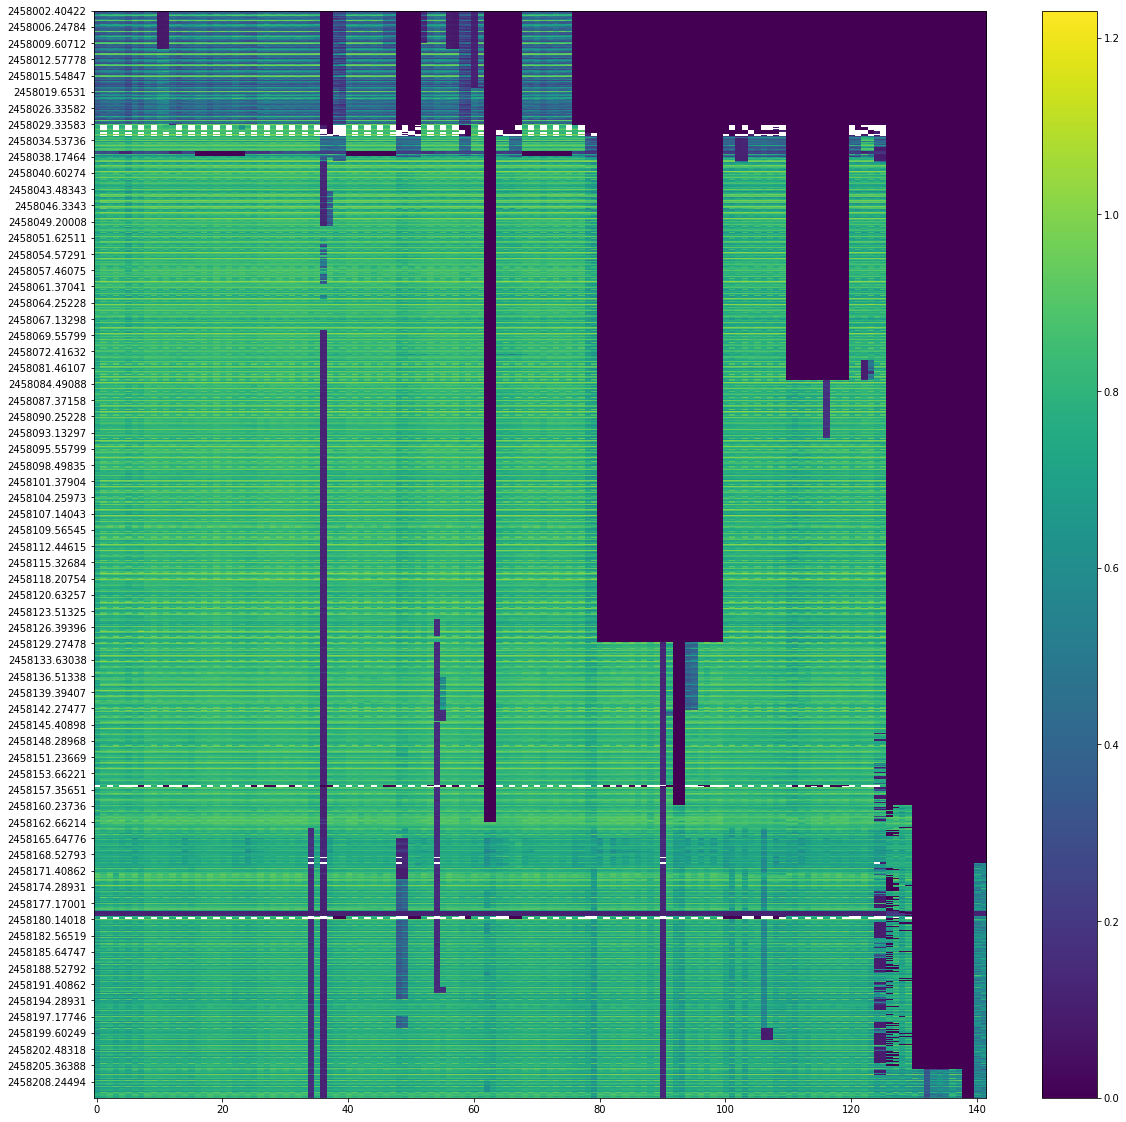

In [24]:

plt.figure(figsize=(20,20))

plt.yticks(np.arange(0,13601,203),time_lst)

plt.imshow(metric_redCorr, aspect='auto')

plt.colorbar()

plt.show()




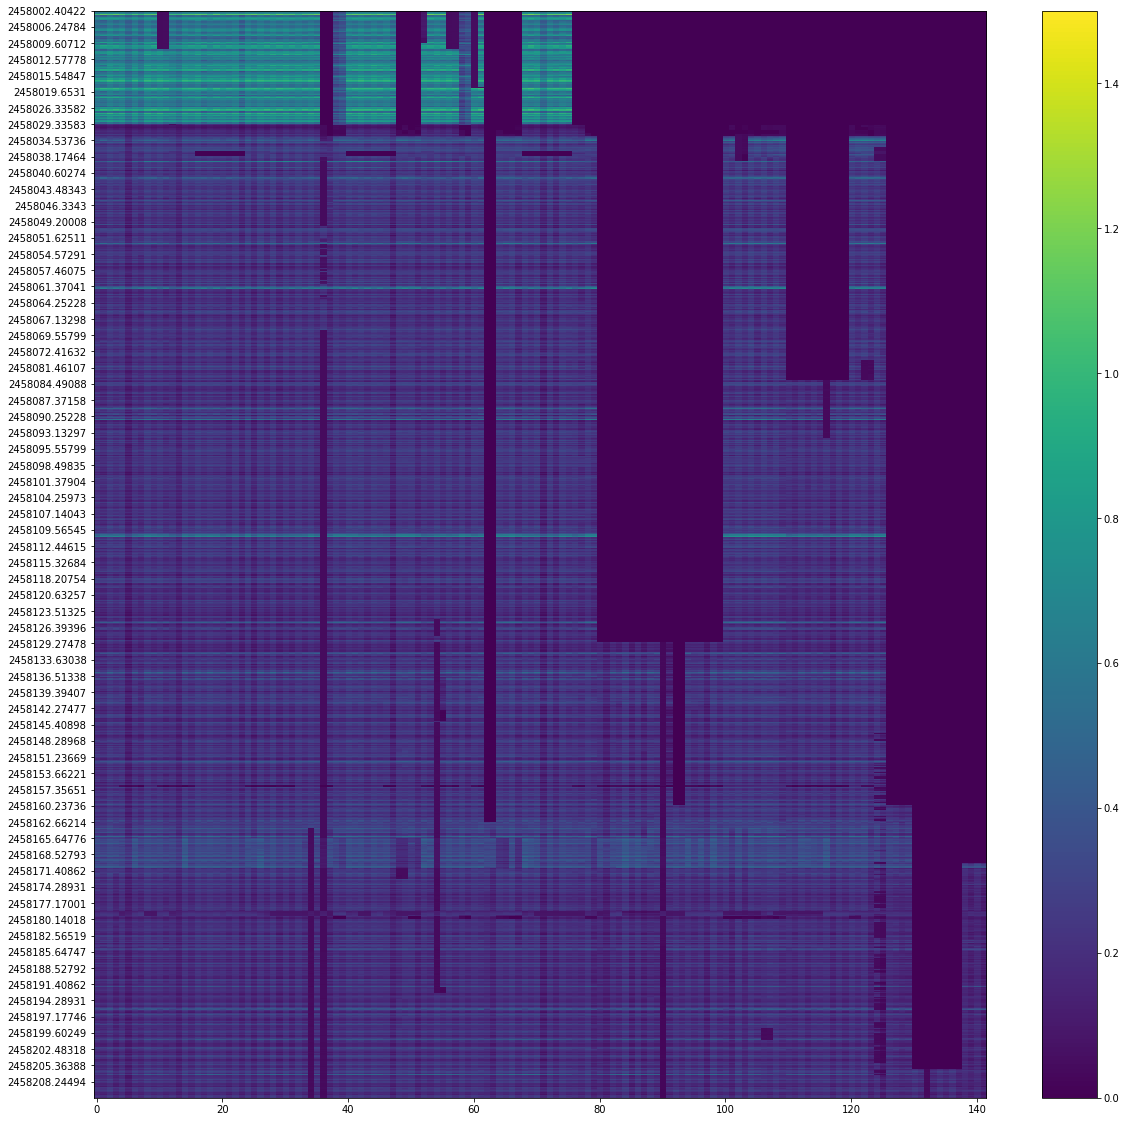

In [25]:
plt.figure(figsize=(20,20))

plt.yticks(np.arange(0,13601,203),time_lst)

plt.imshow(metric_meanVij, aspect='auto',vmin = 0, vmax = 1.5)

plt.colorbar()

plt.show()


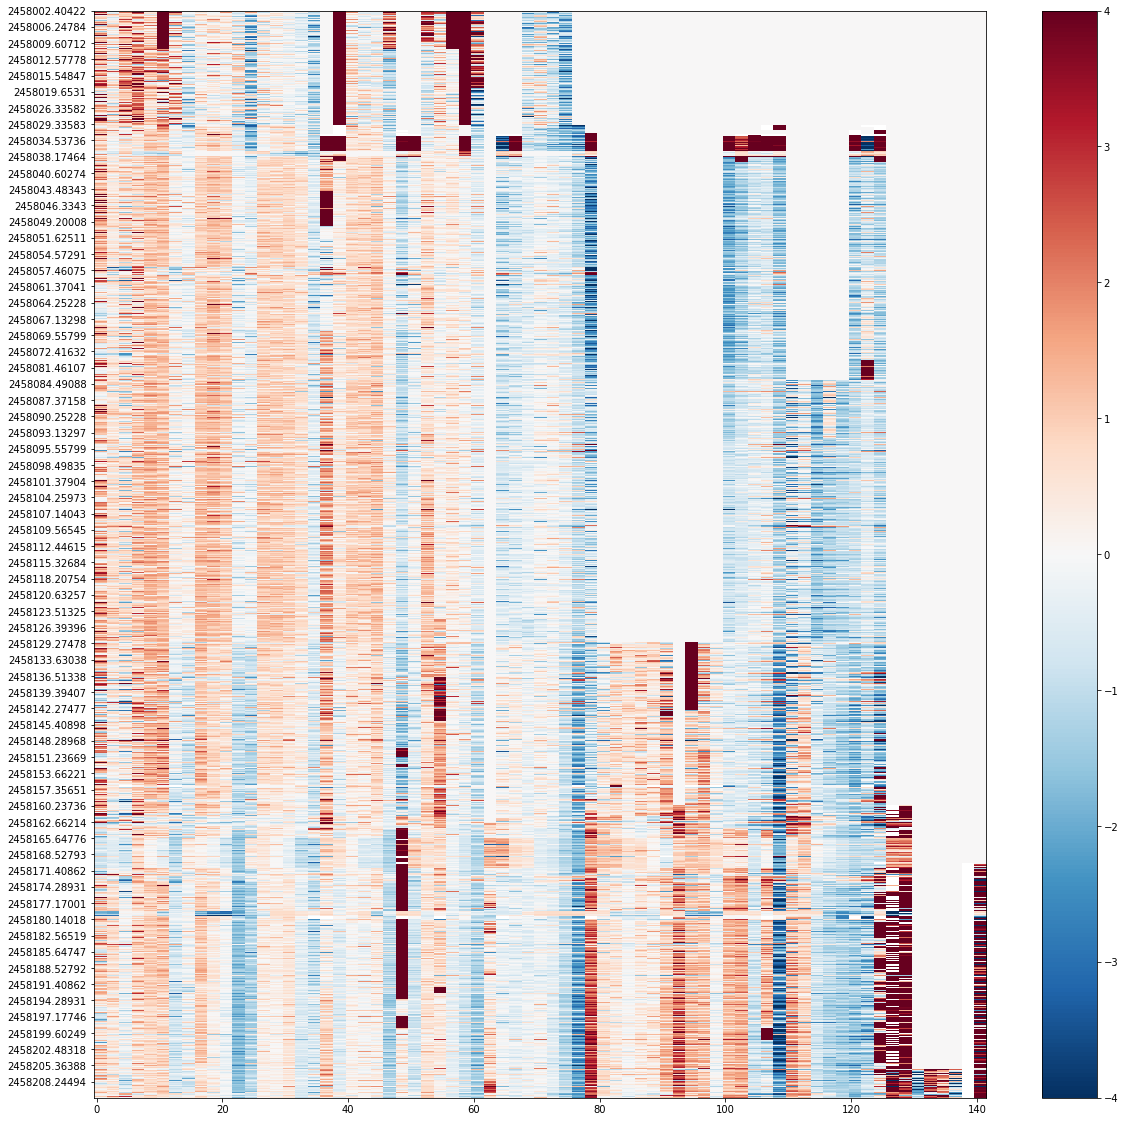

In [26]:

plt.figure(figsize=(20,20))

plt.yticks(np.arange(0,13601,203),time_lst)

cmap=cm.RdBu_r

plt.imshow(metric_redCorrXPol, aspect='auto', vmin = -4, vmax = 4, cmap = cmap)

#plt.imshow(metric_redCorrXPol, aspect='auto', norm=SymLogNorm(vmin=-10,vmax=10,linthresh=.1),cmap = cmap)

plt.colorbar()

plt.show()


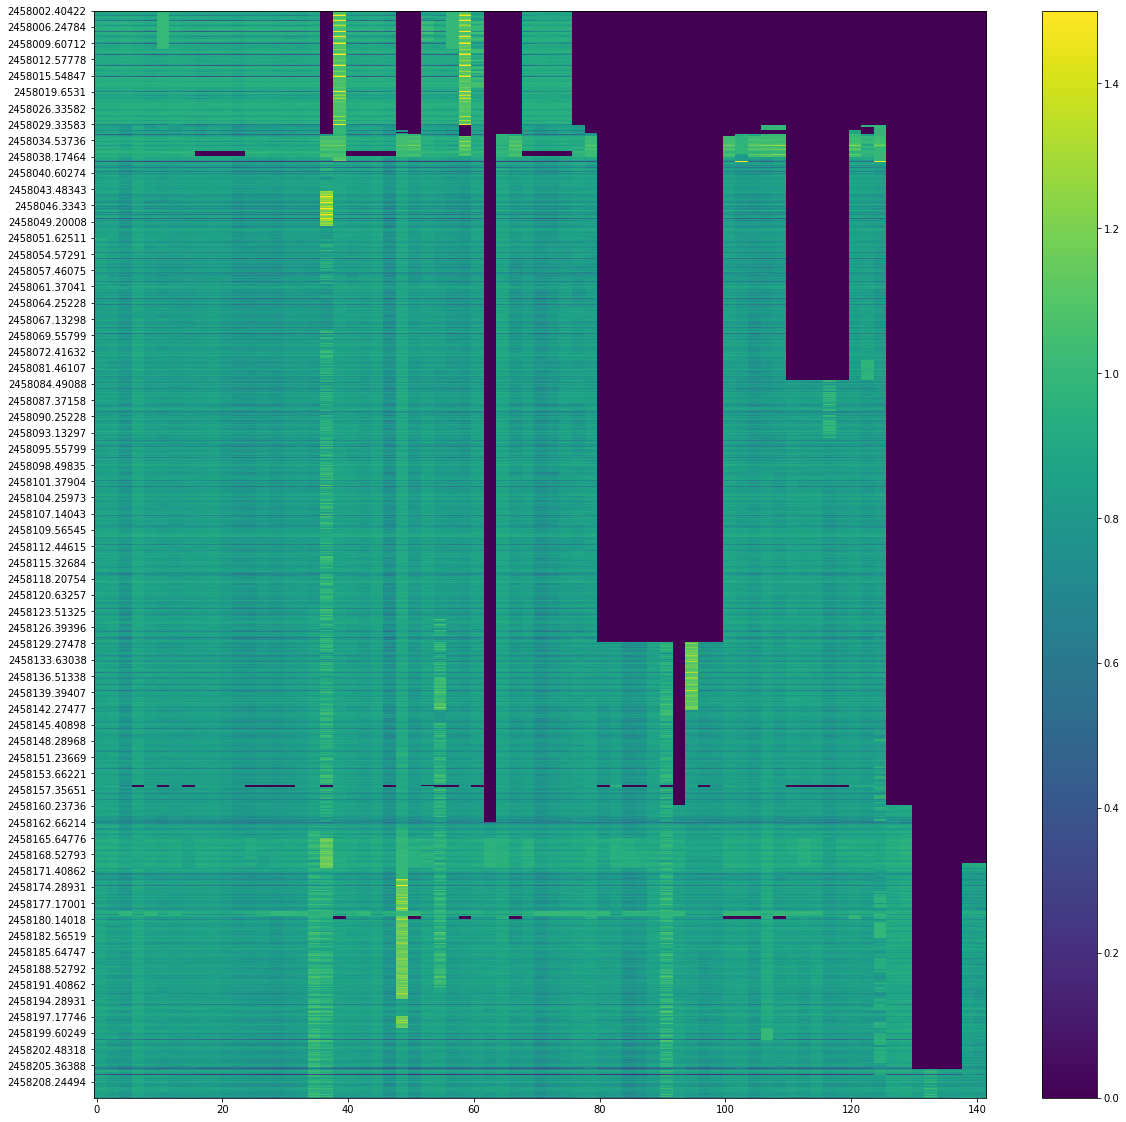

In [27]:

plt.figure(figsize=(20,20))

plt.yticks(np.arange(0,13601,203),time_lst)

plt.imshow(metric_meanVijXPol, aspect='auto', vmin = 0, vmax = 1.5)

#plt.imshow(metric_meanVijXPol, aspect='auto', norm=SymLogNorm(vmin=0,vmax=3,linthresh=.1))

plt.colorbar()

plt.show()


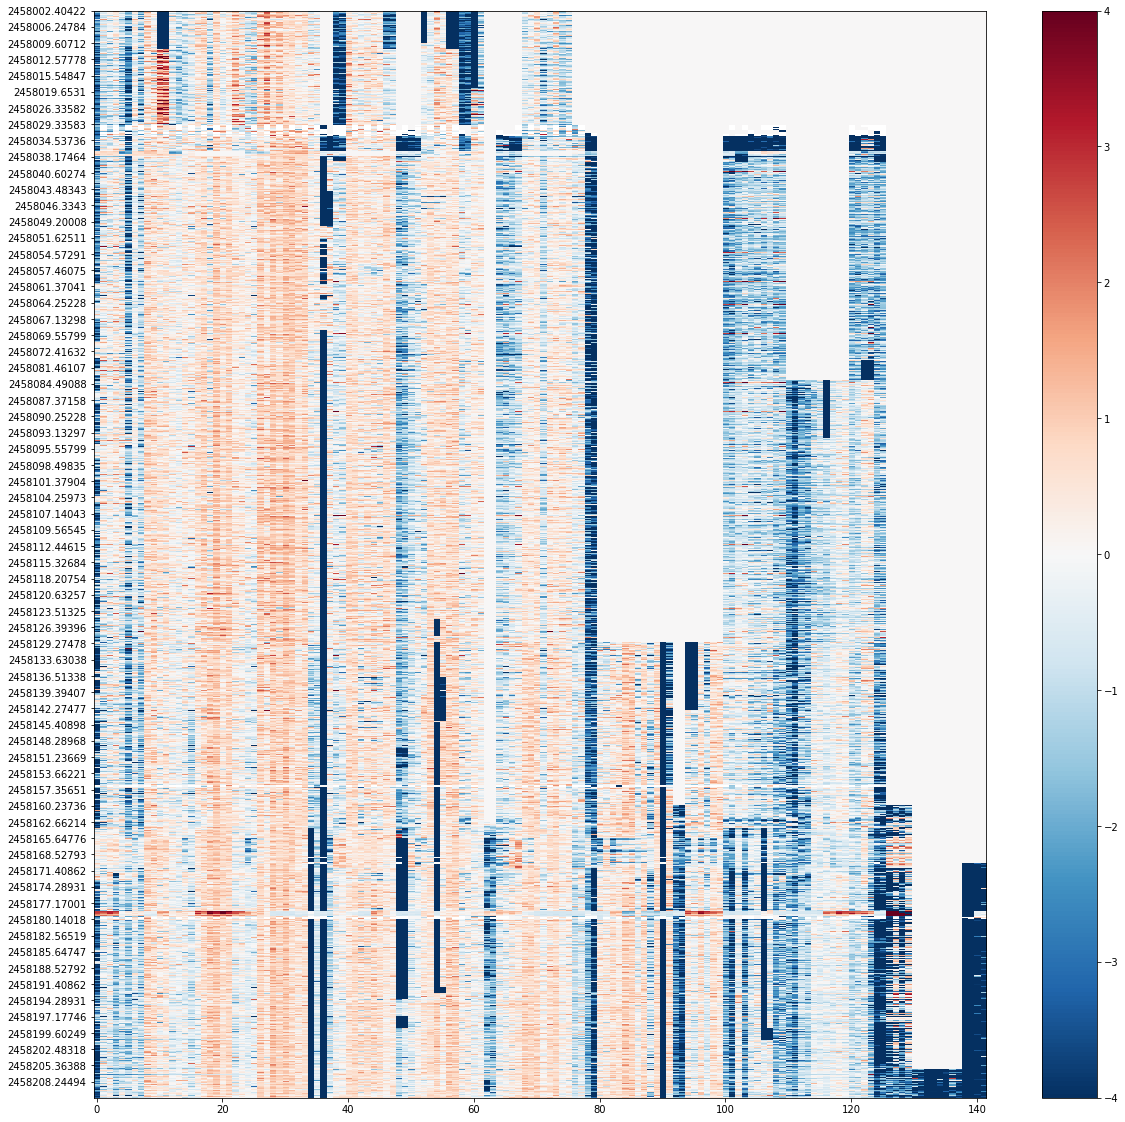

In [28]:

plt.figure(figsize=(20,20))

plt.yticks(np.arange(0,13601,203),time_lst)

cmap=cm.RdBu_r

plt.imshow(zscore_redCorr, aspect='auto',vmin = -4, vmax = 4, cmap = cmap)

#plt.imshow(zscore_redCorr, aspect='auto', norm=SymLogNorm(vmin=-5,vmax=5,linthresh=.1),cmap = cmap)

plt.colorbar()

plt.show()


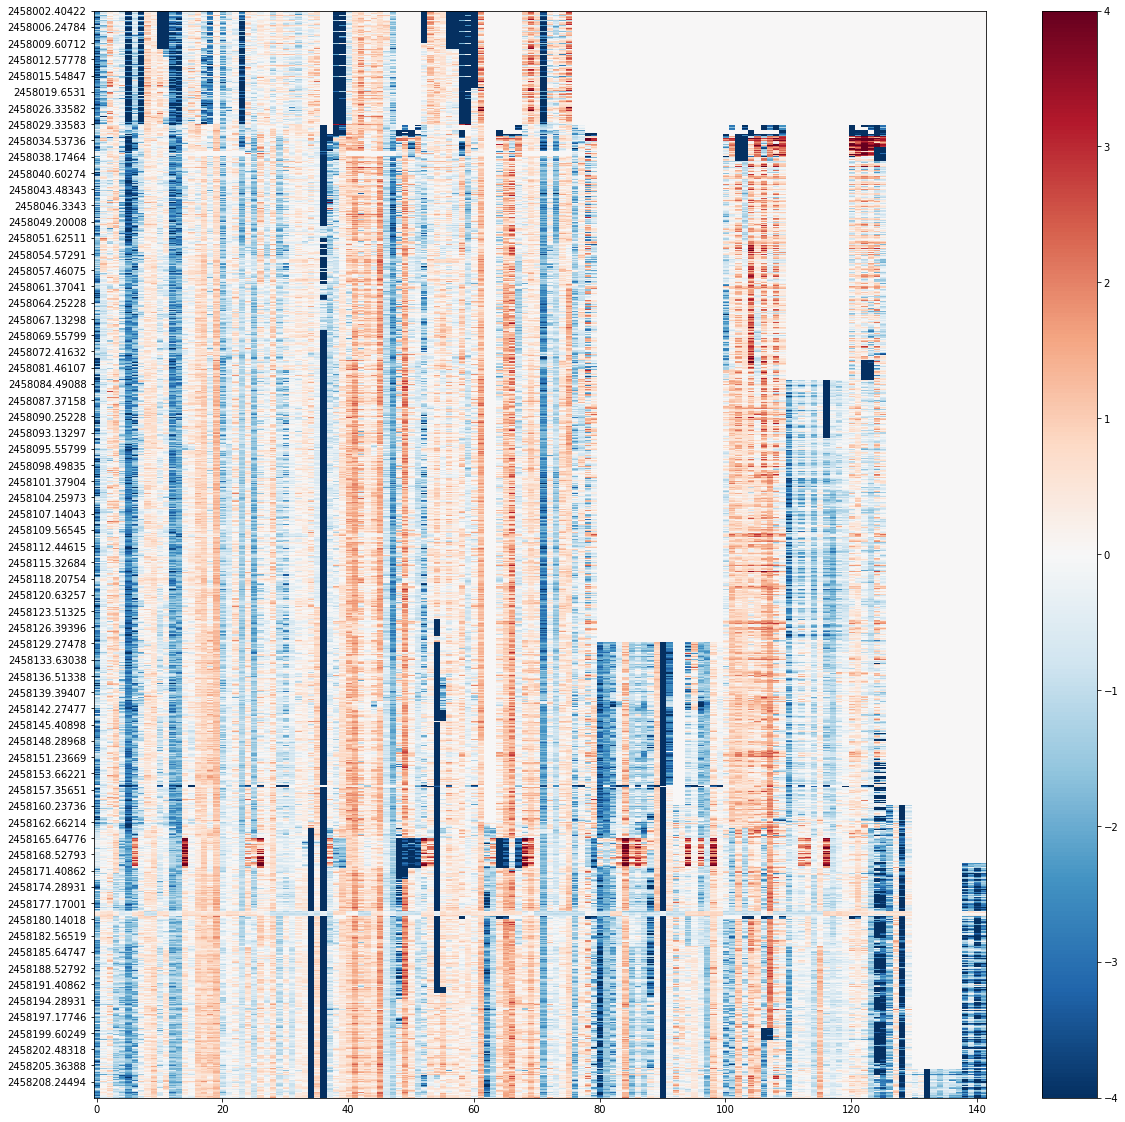

In [29]:

plt.figure(figsize=(20,20))

plt.yticks(np.arange(0,13601,203),time_lst)

cmap=cm.RdBu_r

plt.imshow(zscore_meanVij, aspect='auto',vmin = -4, vmax = 4, cmap = cmap)

#plt.imshow(zscore_meanVij, aspect='auto', norm=SymLogNorm(vmin=-10,vmax=10,linthresh=.1),cmap = cmap)

plt.colorbar()

plt.show()


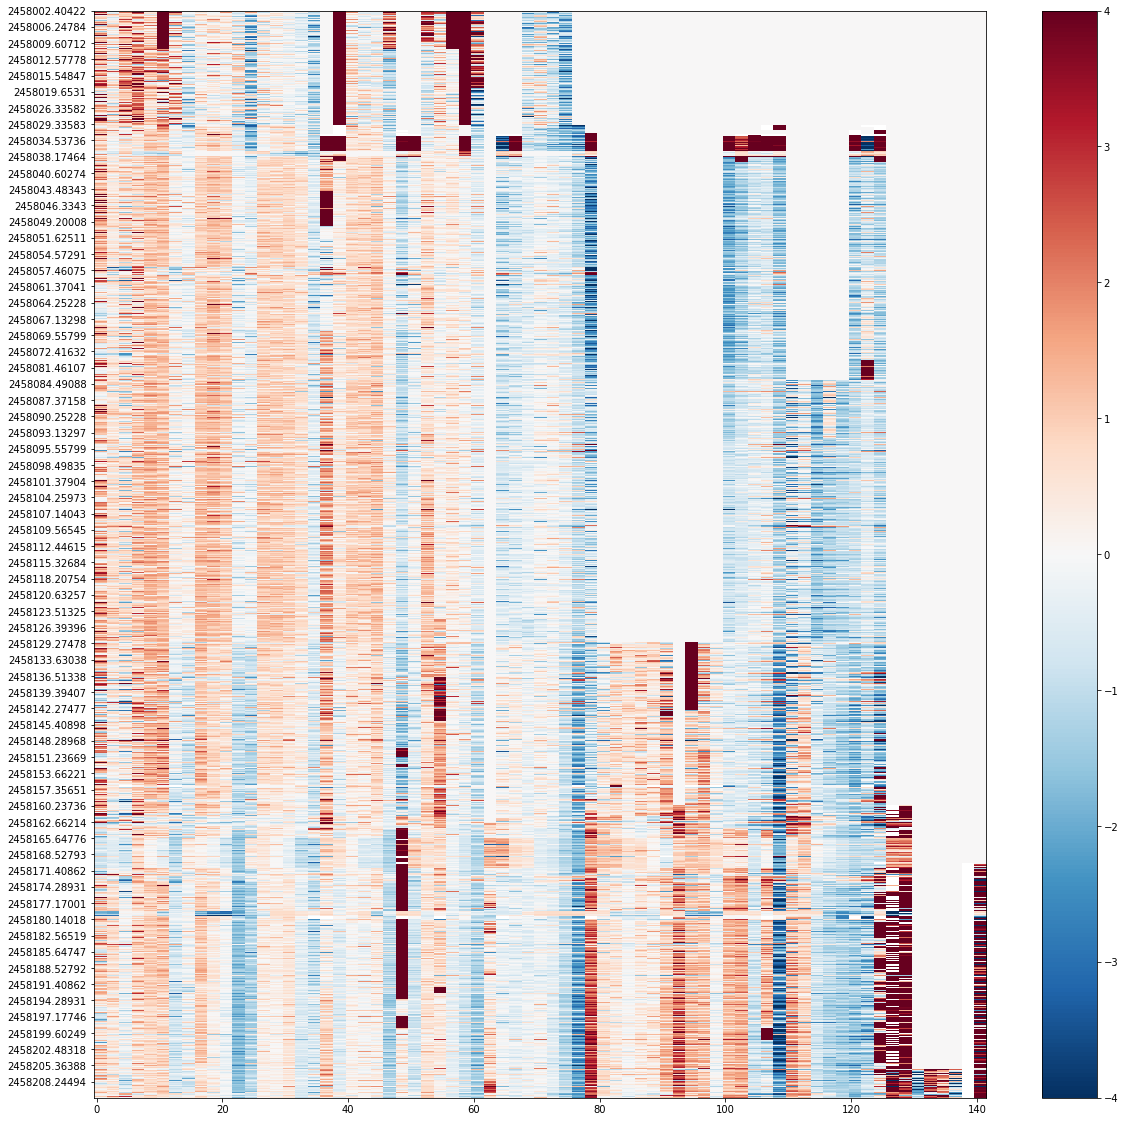

In [30]:

plt.figure(figsize=(20,20))

plt.yticks(np.arange(0,13601,203),time_lst)

cmap=cm.RdBu_r

plt.imshow(zscore_redCorrXPol, aspect='auto',vmin = -4, vmax = 4,cmap = cmap)

#plt.imshow(zscore_redCorrXPol, aspect='auto', norm=SymLogNorm(vmin=-10,vmax=10,linthresh=.1),cmap = cmap)

plt.colorbar()

plt.show()


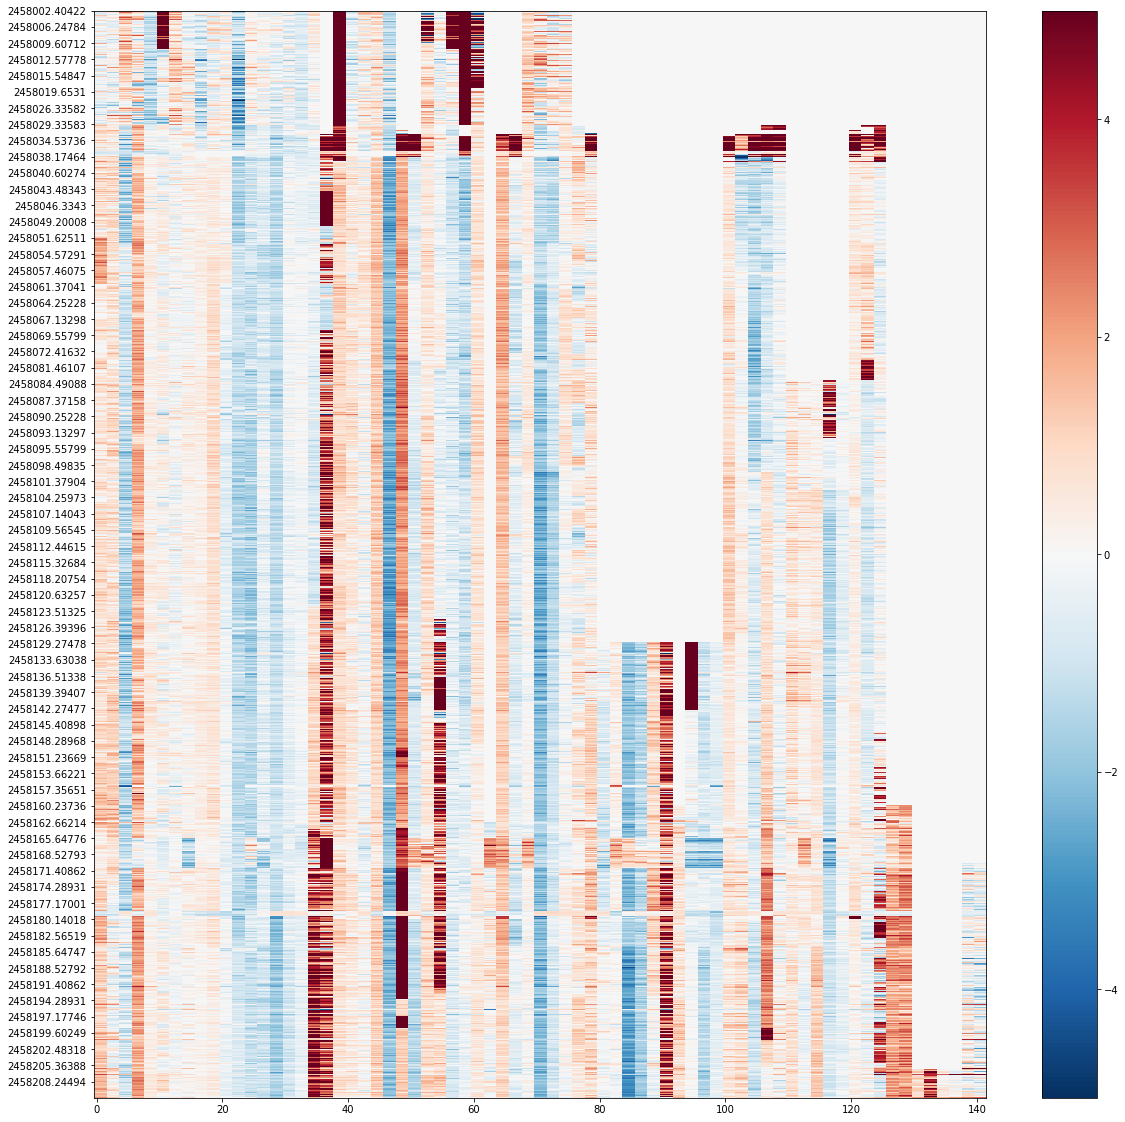

In [31]:

plt.figure(figsize=(20,20))

plt.yticks(np.arange(0,13601,203),time_lst)

cmap=cm.RdBu_r

plt.imshow(zscore_meanVijXPol, aspect='auto', vmin = -5, vmax = 5, cmap = cmap)

#plt.imshow(zscore_meanVijXPol, aspect='auto', norm=SymLogNorm(vmin=-5,vmax=20,linthresh=.1),cmap = cmap)

plt.colorbar()

plt.show()


In [32]:

print len(time_array)


13601
